<a href="https://colab.research.google.com/github/hvyrain/bigprobasic/blob/main/%EB%AA%A8%EB%91%90%EC%9D%98%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D01_%EA%B8%B0%EC%98%A8%EA%B3%B5%EA%B3%B5%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 01. 기온 데이터 분석 시작하기


### 01. 기온 공공데이터 살펴보기, p14
https://data.kma.go.kr - 기후통계분석 - 기후분석
- 분류 : 지상
- 지역/지점 : 서울
- 요소 : ㅣ온
- 기간 : 일, 일자 선택
- csv 다운로드 버튼 클릭

### 02. CSV 파일이란, p18
csv : Comma-Separated Values

### 03. 데이터 분석에 필요한 환경 만들기, p21
- 구글 코랩 : https://colab.research.google.com
- 캐글 : https://www.kaggle.com
- 주피터 노트북 : 아나콘다(https://www.anaconda.com) 설치 후 주피터 노트북 설치

## 02. 서울의 기온 데이터 분석하기

### 01. CSV 파일에서 데이터 읽어오기, p28
- 함수 : csv.reader() , csv.writer()
- 다운로드 : https://data.kma.go.kr - 기후통계분석 - 기후분석 - 기온분석, 1904.1.1 ~ 2019.1.17, 서울 선택 - 검색 - CSV 다운로드

In [ ]:
# CSV 파일을 코랩으로 업로드해 둔다., p33
import csv
f = open('seoul.csv', encoding='cp949')
data = csv.reader(f, delimiter=',')
print(data)
f.close()

In [ ]:
# ※ pandas read_csv의 활용
import pandas as pd
data = pd.read_csv('seoul.csv', encoding='cp949')
data.head()
data.max()

날짜         2018-03-28
지점                108
평균기온(℃)          33.1
최저기온(℃)          28.8
최고기온(℃)          38.4
dtype: object

### 02. 데이터 출력하기, p36

In [ ]:
# p37
import csv
f = open('seoul.csv', encoding='cp949')
data = csv.reader(f, delimiter=',')
counter = 0
for row in data :
  counter += 1
  if counter < 10 : 
    print(row) 
  else : 
    break
f.close()

['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)']
['1907-10-01', '108', '13.5', '7.9', '20.7']
['1907-10-02', '108', '16.2', '7.9', '22']
['1907-10-03', '108', '16.2', '13.1', '21.3']
['1907-10-04', '108', '16.5', '11.2', '22']
['1907-10-05', '108', '17.6', '10.9', '25.4']
['1907-10-06', '108', '13', '11.2', '21.3']
['1907-10-07', '108', '11.3', '6.3', '16.1']
['1907-10-08', '108', '8.9', '3.9', '14.9']


### 03. 헤더 저장하기, p39
- next() 함수를 이용하여 한 줄을 버린다.

In [ ]:
# p40
import csv
f = open('seoul.csv', encoding='cp949')
data = csv.reader(f, delimiter=',')
header = next(data) # 헤더 한 줄 건너띄기
counter = 0
for row in data :
  counter += 1
  if counter < 10 : 
    print(row) 
  else : 
    break
f.close()

['1907-10-01', '108', '13.5', '7.9', '20.7']
['1907-10-02', '108', '16.2', '7.9', '22']
['1907-10-03', '108', '16.2', '13.1', '21.3']
['1907-10-04', '108', '16.5', '11.2', '22']
['1907-10-05', '108', '17.6', '10.9', '25.4']
['1907-10-06', '108', '13', '11.2', '21.3']
['1907-10-07', '108', '11.3', '6.3', '16.1']
['1907-10-08', '108', '8.9', '3.9', '14.9']
['1907-10-09', '108', '11.6', '3.8', '21.1']


## 03. 서울이 가장 더웠던 날은 언제였을까

### 01. 질문 다듬기, p43
- 서울이 가장 더웠던 날은 언제였을까? 얼마나 더웠을까?
- 기상 관측 이래, 서울의 최고 기온이 가장 높았던 날은 언제였고, 몇 도였을까?

### 02. 문제 해결 방법 구상하기, p44
- 날짜, 최고기온 열(필드)
1. 데이터를 읽어 온다.
1. 순차적으로 최고 기온을 확인한다.
1. 최고 기온이 가장 높았던 날짜의 데이터를 저장한다.
1. 최종 저장된 데이터를 출력한다.


### 03. 파이썬 코드로 구현하기, p45
- float() 함수는 빈 값은 변환할 수 없으므로 다른 작은 값(-999)로 대체한다.

In [ ]:
# p47
import csv
f = open('seoul.csv', encoding='cp949')
data = csv.reader(f)
header = next(data)
for row in data :
  if row[4] == '' :
    row[4] = -999
  row[4] = float(row[4])
  print(row)
  if row[4] > 30 :
    break
f.close()

In [ ]:
# p51
import csv
f = open('seoul.csv', encoding='cp949')
data = csv.reader(f)
header = next(data)
max_temp = -999
max_date = ''
for row in data :
  if row[4] == '' :
    row[4] = -999
  row[4] = float(row[4])
  if max_temp < row[4] : 
    max_temp = row[4]
    max_date = row[0]
f.close()
print(f'기상 관측 이래 서울의 최고 기온이 가장 높았던 날은 {max_date}이고, 기온은 {max_temp}도입니다.')

기상 관측 이래 서울의 최고 기온이 가장 높았던 날은 1994-07-24이고, 기온은 38.4도입니다.


### 년간 평균기온 추이

In [2]:
import csv
f = open('seoul-utf8.csv')
data = list(csv.reader(f))
data[0]

['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)']

113 년
기온차 :  2.8445355191256905


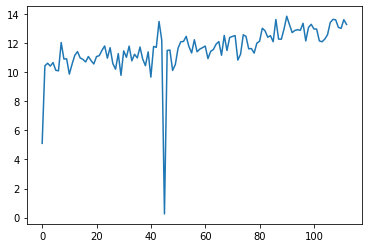

In [15]:
year_mean = []
year_temp = []
year = int(data[1][0].split('-')[0])
for i in range(1,len(data)) :
  year_last = int(data[i][0].split('-')[0])
  if year == year_last :
    if data[i][2] != '' :
      year_temp.append(float(data[i][2]))
  else :
    if len(year_temp) > 0 :
      avg = sum(year_temp) / len(year_temp)
      year_mean.append(avg)
      year_temp.clear()
      year = int(data[i][0].split('-')[0])
    if data[i][2] != '' :
      year_temp.append(float(data[i][2]))

print(len(year_mean), '년')
print('기온차 : ', year_mean[-1] - year_mean[1])
import matplotlib.pyplot as plt
plt.plot(year_mean)
plt.show()

# 1907년은 10월 부터 기록되어 낮음.
# 1950년대 전쟁 중에는 데이터 기록이 제대로 이루어지지 않음.

## Pandas로 조작하기
- 내 생일의 기온 그래프 그리기
- 참조 : https://datascienceschool.net/01%20python/04.00%204%EC%9E%A5%20%ED%8C%90%EB%8B%A4%EC%8A%A4%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D.html
- 참조 : https://blog.naver.com/wideeyed/221603778414

#### 한글 깨짐 방지
- https://teddylee777.github.io/colab/colab-korean
- https://blog.naver.com/seodaewoo/222466735915 

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 실행 후 런타임 - 런타임 재시작 메뉴 선택 필수

In [ ]:
# 한글 글꼴을 사용하기 위함.
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic') 
plt.figure(figsize=(10,4))
plt.rcParams['axes.unicode_minus'] = False

<Figure size 720x288 with 0 Axes>

### 기온데이터 가져오기

In [1]:
!wget https://raw.githubusercontent.com/hvyrain/pythonall/main/seoul-utf8.csv

--2021-09-02 13:46:46--  https://raw.githubusercontent.com/hvyrain/pythonall/main/seoul-utf8.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1212955 (1.2M) [text/plain]
Saving to: ‘seoul-utf8.csv’

seoul-utf8.csv      100%[===================>]   1.16M  --.-KB/s    in 0.05s   

2021-09-02 13:46:46 (21.9 MB/s) - ‘seoul-utf8.csv’ saved [1212955/1212955]



In [ ]:
# 데이터 가져오기
import pandas as pd
df = pd.read_csv('seoul-utf8.csv')
df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


### 서울의 최고, 최저기온 가져오기


In [ ]:
df.describe()

,지점,평균기온(℃),최저기온(℃),최고기온(℃)
count,41159.0,40403.000000,40402.000000,40401.000000
mean,108.0,11.753511,7.459730,16.760996
std,0.0,10.658904,10.884408,10.982077
min,108.0,-19.200000,-23.100000,-16.300000
25%,108.0,2.700000,-1.400000,7.200000
50%,108.0,13.000000,8.000000,18.600000
75%,108.0,21.200000,17.100000,26.300000
max,108.0,33.700000,30.300000,39.600000


In [ ]:
# 최고기온, idxmax() 함수 사용
df.iloc[df['최고기온(℃)'].idxmax(), :]

날짜         2018-08-01
지점                108
평균기온(℃)          33.6
최저기온(℃)          27.8
최고기온(℃)          39.6
Name: 40051, dtype: object

In [ ]:
# 최저기온, idxmin() 함수 사용
df.iloc[df['최저기온(℃)'].idxmin(), :]

날짜         1927-12-31
지점                108
평균기온(℃)         -15.3
최저기온(℃)         -23.1
최고기온(℃)          -6.4
Name: 7396, dtype: object

In [ ]:
# 값을 기준으로 정렬 후 가져오기
d = df.sort_values(by='최고기온(℃)', ascending=False) # 내림차순 정렬
d.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
40051,2018-08-01,108,33.6,27.8,39.6
31277,1994-07-24,108,33.1,28.1,38.4
40050,2018-07-31,108,32.6,27.8,38.3
31276,1994-07-23,108,32.6,28.0,38.2
13111,1943-08-24,108,29.0,23.2,38.2


In [ ]:
d.head().style.background_gradient(cmap='summer')

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
40051,2018-08-01,108,33.600000,27.800000,39.600000
31277,1994-07-24,108,33.100000,28.100000,38.400000
40050,2018-07-31,108,32.600000,27.800000,38.300000
31276,1994-07-23,108,32.600000,28.000000,38.200000
13111,1943-08-24,108,29.000000,23.200000,38.200000


In [ ]:
# 값을 기준으로 정렬 후 가져오기
d = df.sort_values(by='최저기온(℃)', ascending=True) # 내림차순 정렬
d.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
7396,1927-12-31,108,-15.3,-23.1,-6.4
8503,1931-01-11,108,-17.4,-22.5,-14.7
4478,1920-01-04,108,-14.7,-22.3,-8.5
7401,1928-01-05,108,-15.1,-22.2,-10.6
8502,1931-01-10,108,-18.9,-21.9,-13.0


In [ ]:
d.head().style.background_gradient(cmap='summer')

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
7396,1927-12-31,108,-15.300000,-23.100000,-6.400000
8503,1931-01-11,108,-17.400000,-22.500000,-14.700000
4478,1920-01-04,108,-14.700000,-22.300000,-8.500000
7401,1928-01-05,108,-15.100000,-22.200000,-10.600000
8502,1931-01-10,108,-18.900000,-21.900000,-13.000000


### 생일의 기온 처리

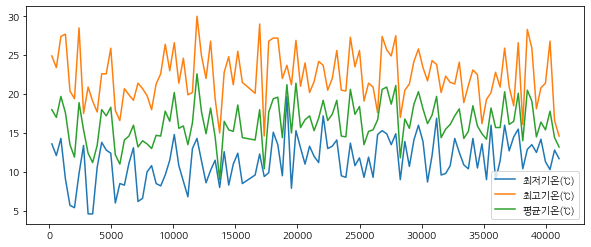

In [ ]:
# 생일에 해당하는 행만 가져와서 그래프 그리기
birth = df[df['날짜'].str.contains('-05-10')]
# NaN 행 제거
birth = birth[birth['평균기온(℃)'].notnull()]
birth[[ '최저기온(℃)', '최고기온(℃)',  '평균기온(℃)']].plot(figsize=(10,4))

In [ ]:
birth[[ '최저기온(℃)', '최고기온(℃)',  '평균기온(℃)']].describe()


,최저기온(℃),최고기온(℃),평균기온(℃)
count,111.000000,111.000000,111.000000
mean,11.501802,22.272973,16.360360
std,2.845826,3.414140,2.626345
min,4.600000,14.600000,9.000000
25%,9.500000,20.200000,14.500000
50%,11.500000,21.600000,16.200000
75%,13.550000,24.900000,18.150000
max,19.700000,30.000000,22.600000


In [ ]:
print(f"내 생일의 최고 기온 : {birth['최고기온(℃)'].max():.2f}\n 최저 기온 : {birth['최고기온(℃)'].min():.2f} \n 평균 기온 : {birth['최고기온(℃)'].mean():.2f}")

내 생일의 최고 기온 : 30.00
 최저 기온 : 14.60 
 평균 기온 : 22.27


### Pandas로 N 년씩 그룹핑하기
1. 날짜의 앞 4자리만 가져와서 새로운 데이터프레임을 만든다.
1. 정수로 변환한 후 원래 데이터프레임과 년도 데이터프레임을 열로 합친다.
1. 년도를 N으로 나눈 나머지로 group 열을 만든다.
1. 그래프를 그린다.

In [ ]:
df1 = df.copy()
df1

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4
...,...,...,...,...,...
41154,2021-08-08,108,26.8,24.4,32.1
41155,2021-08-09,108,28.3,23.3,33.6
41156,2021-08-10,108,27.7,24.3,32.2
41157,2021-08-11,108,27.4,24.1,31.6


In [ ]:
# 날짜를 잘라서 년도만 가져오기
df1['년도'] = df1['날짜'].str.slice(0,4).astype(int)
# 10년 단위 그룹으로 나누기
df1['그룹'] = df1['년도'] // 10
# 월 추가
df1['월'] = df1['날짜'].str.slice(5,7).astype(int)
# 월을 계절로 바꾸기, 0 : 겨울, 1 : 봄, 2 : 여름, 3 : 가을
df1['계절'] = (df1['월'] // 3) % 4

In [ ]:
df1

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),년도,그룹,월,계절
0,1907-10-01,108,13.5,7.9,20.7,1907,190,10,3
1,1907-10-02,108,16.2,7.9,22.0,1907,190,10,3
2,1907-10-03,108,16.2,13.1,21.3,1907,190,10,3
3,1907-10-04,108,16.5,11.2,22.0,1907,190,10,3
4,1907-10-05,108,17.6,10.9,25.4,1907,190,10,3
...,...,...,...,...,...,...,...,...,...
41154,2021-08-08,108,26.8,24.4,32.1,2021,202,8,2
41155,2021-08-09,108,28.3,23.3,33.6,2021,202,8,2
41156,2021-08-10,108,27.7,24.3,32.2,2021,202,8,2
41157,2021-08-11,108,27.4,24.1,31.6,2021,202,8,2


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


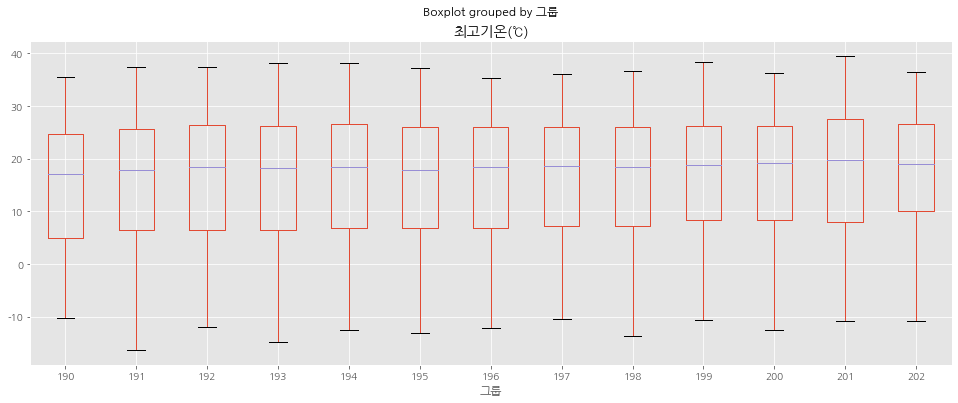

In [ ]:
df1.boxplot(column='최고기온(℃)', by='그룹', figsize=(16,6))

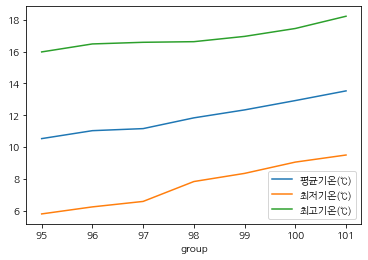

In [ ]:
df2.iloc[:, 2:5].groupby(df2.group).mean().plot()
plt.show()

### Pandas로 월별로 그룹핑하여 boxplot 그리기
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html 
- df.boxplot(column='col1', by='col2')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


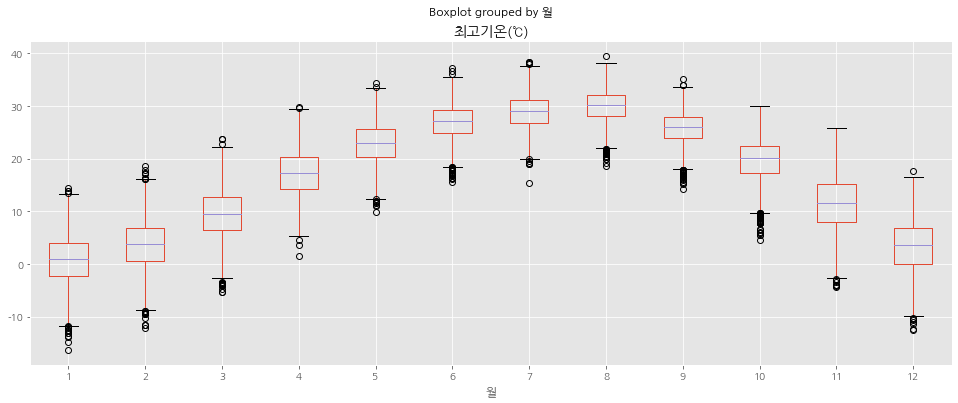

In [ ]:
df2 = df.copy()
s = df2['날짜'].str.slice(5,7)
sf = pd.DataFrame(s, columns=['날짜'])
sf.columns = ['월']
df3 = pd.merge(df2, sf, left_index=True, right_index=True)
#df3['월'] = df3['월'].astype(int)
# NaN을 제거해야 그래프를 그릴 수 있다.
df3 = df3[df3['최고기온(℃)'].notnull()]
df1.boxplot(column='최고기온(℃)', by='월', figsize=(16,6))

### 월을 계절로 변환하여 출력하기
- 계절 = (월 // 3) % 4 
- 0 : 겨울, 1 : 봄, 2 : 여름, 3 : 가을

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


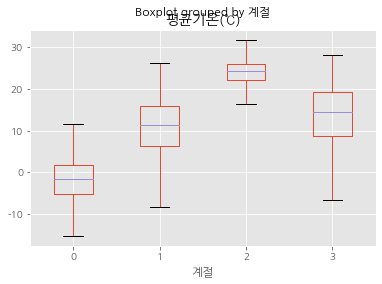

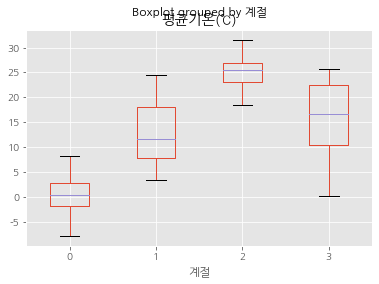

In [ ]:
# 월을 계절로 변환하기, 환절기(봄, 가을)이 일교차가 크다^^
df10 = df.copy()
df10['월'] = df10['날짜'].str.slice(5,7).astype(int)
df10['계절'] = (df10['월'] // 3) % 4
df10.boxplot(column='평균기온(℃)', by='계절', showfliers=False)
df10[df10['날짜'].str.contains('2019-')].boxplot(column='평균기온(℃)', by='계절', showfliers=False)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

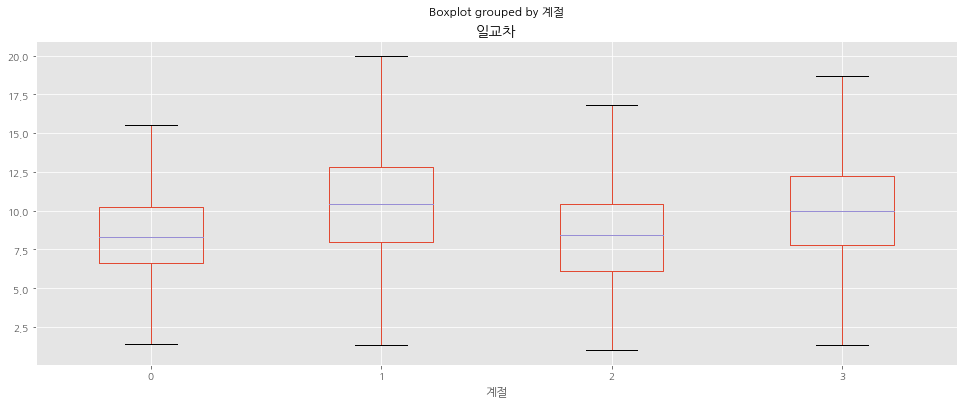

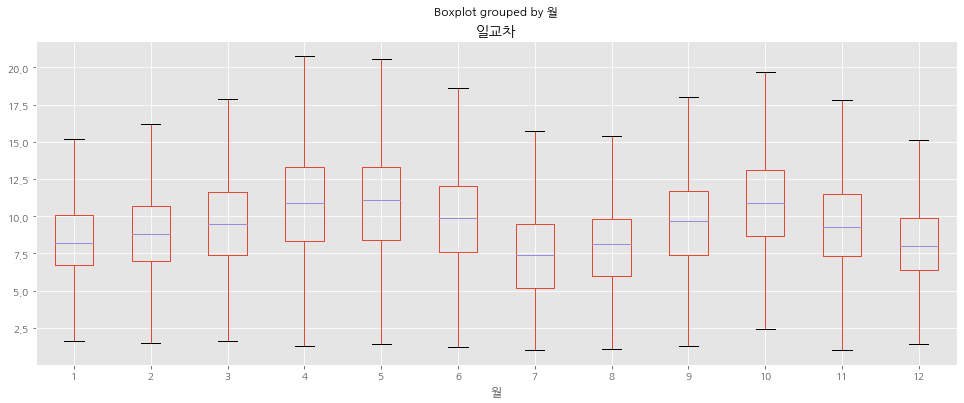

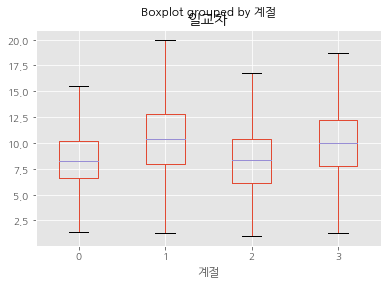

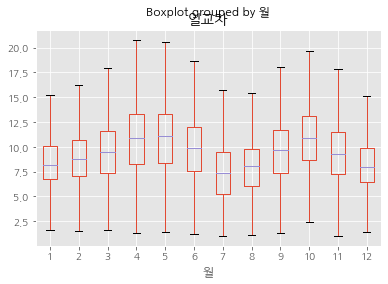

In [ ]:
# 월을 계절로 변환하기, 환절기(봄, 가을)이 일교차가 크다^^
df1['일교차'] = df1['최고기온(℃)'] - df1['최저기온(℃)']
df1.boxplot(column='일교차', by='계절', showfliers=False, figsize=(16,6))
df1.boxplot(column='일교차', by='월', showfliers=False, figsize=(16,6))

df9 = df.copy()
df9['월'] = df10['날짜'].str.slice(5,7).astype(int)
df9['계절'] = (df10['월'] // 3) % 4
df9['일교차'] = df9['최고기온(℃)'] - df9['최저기온(℃)']
df9.boxplot(column='일교차', by='계절', showfliers=False)
df9.boxplot(column='일교차', by='월', showfliers=False)

In [ ]:
df9[df9['계절']==0]['일교차'].describe()

count    10017.000000
mean         8.506948
std          2.667414
min          1.000000
25%          6.600000
50%          8.300000
75%         10.200000
max         21.300000
Name: 일교차, dtype: float64

In [ ]:
df9[df9['계절']==1]['일교차'].describe()

count    10212.000000
mean        10.411878
std          3.423284
min          1.300000
25%          8.000000
50%         10.400000
75%         12.800000
max         21.800000
Name: 일교차, dtype: float64

In [ ]:
df9[df9['계절']==2]['일교차'].describe()

count    10193.000000
mean         8.344217
std          3.103418
min          1.000000
25%          6.100000
50%          8.400000
75%         10.400000
max         21.000000
Name: 일교차, dtype: float64

In [ ]:
df9[df9['계절']==3]['일교차'].describe()

count    9979.000000
mean        9.939774
std         3.191653
min         1.000000
25%         7.800000
50%        10.000000
75%        12.200000
max        21.200000
Name: 일교차, dtype: float64

In [ ]:
df9

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),월,계절,일교차
0,1907-10-01,108,13.5,7.9,20.7,10,3,12.8
1,1907-10-02,108,16.2,7.9,22.0,10,3,14.1
2,1907-10-03,108,16.2,13.1,21.3,10,3,8.2
3,1907-10-04,108,16.5,11.2,22.0,10,3,10.8
4,1907-10-05,108,17.6,10.9,25.4,10,3,14.5
...,...,...,...,...,...,...,...,...
41154,2021-08-08,108,26.8,24.4,32.1,8,2,7.7
41155,2021-08-09,108,28.3,23.3,33.6,8,2,10.3
41156,2021-08-10,108,27.7,24.3,32.2,8,2,7.9
41157,2021-08-11,108,27.4,24.1,31.6,8,2,7.5


In [ ]:
x = [(i//3)%4 for i in range(1,13)]
x

[0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 0]

## 10년씩 기온 평균 구기
- 10년 단위로 평균 기온을 평균내어 그래프로 그려본다.

In [ ]:
# 10년 단위 (1900, 1910, 1920, ...) 평균 기온의 평균 그려보기 - 온난화 확인
import csv
f = open('seoul.csv', encoding='cp949')
data = csv.reader(f)
header = next(data)
print(header)
# 년도 색인, 1900~1909 : 0, 1910 ~ 1919 : 1, ...
year = -1
# 평균 온도를 저장하는 13개의 리스트
avg_temp = []
min_temp = []
max_temp = []
for i in range(13) :
  avg_temp.append([])
  max_temp.append([])
  min_temp.append([])

for row in data :
# 빈 데이터가 아니라면 temp 리스트의 해당 요소(리스트)에 추가한다.
  # 일자를 '-' 단위로 분리한 첫 번째
  year = int(row[0].split('-')[0])
  # 일자를 10으로 나누고 190으로 나눈 나머지를 색인으로 사용
  idx = int(year/10) % 190
  if row[2] != '' : # 평균온도
    avg_temp[idx].append(float(row[2]))
  if row[4] != '' : # 최고온도
    max_temp[idx].append(float(row[4]))
  if row[3] != '' : # 최저온도
    min_temp[idx].append(float(row[3]))

['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)']


In [ ]:
avgt = [0] * 13
maxt = [0] * 13
mint = [0] * 13
for i in range(13) :
  avgt[i] = sum(avg_temp[i]) / len(avg_temp[i])
  maxt[i] = sum(max_temp[i]) / len(max_temp[i])
  mint[i] = sum(min_temp[i]) / len(min_temp[i])
print(avgt)
print(maxt)
print(mint)

[9.91263669501823, 10.66645673603508, 11.005036955926618, 11.050684556407468, 11.052395291541181, 11.313225152129808, 11.721927183137185, 11.94698795180721, 11.870024637284411, 12.800657174151125, 12.911141527511603, 12.934474260679092, 13.532542372881359]
[15.279465370595355, 16.144441401971587, 16.451300301122348, 16.52497261774371, 16.68620312072273, 16.450912778904673, 16.525711938663694, 16.73496714129243, 16.541719134957532, 17.38480284775466, 17.238899534628924, 17.68282662284304, 18.23152542372882]
[5.173511543134875, 5.925164293537792, 5.977990692581458, 6.480722891566236, 6.267287161237361, 7.026612576064912, 7.612814895947405, 8.037869660460018, 7.879906925814419, 8.797179627601313, 9.146126471393316, 8.951067907995618, 9.495423728813567]


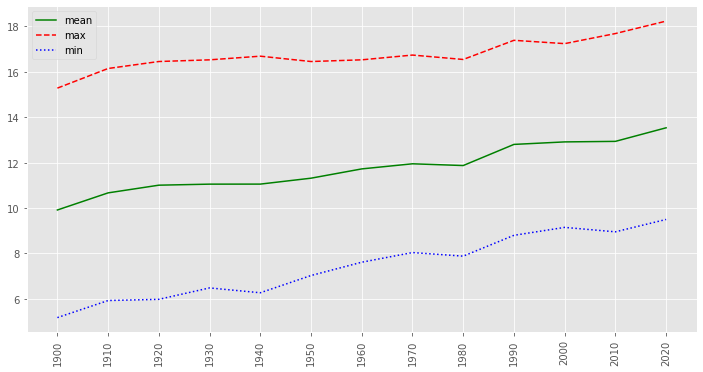

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(12,6))
plt.plot(avgt, 'g', label='mean')
plt.plot(maxt, 'r--', label='max')
plt.plot(mint, 'b:', label='min')
#plt.ylim(-1,12)
plt.xticks(range(13), [1900 + i * 10 for i in range(13)], rotation=90)
plt.legend()
plt.show()

In [ ]:
# 최고 평균 행 가져오기
df.iloc[[df['평균기온(℃)'].idxmax()]]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
40052,2018-08-02,108,33.7,30.3,37.9


In [ ]:
# 최저 평균 행 가져오기
df.iloc[[df['평균기온(℃)'].idxmin()]]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
2661,1915-01-13,108,-19.2,-21.3,-16.3
